# Assignment-6

This notebook contains the questions to test the proficiency in `Statistics`.

### Date: 28th June, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-06-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-06-Dipika_Chopra.ipynb`.
- For numerical problems you can either solve the same using using python in the solution notebook or you can solve it on paper and upload the scan pdf copy of the solution. 
- If you are solving it on paper then name the pdf file of the scan copy of the solution as `Assignment-06-<your_name>_<your_surname>.pdf`. For example if your name is Akash Kumar then name the file as `Assignment-06-Akash_Kumar.pdf`.
- Upload the solved notebook and the scanned pdf copy of the solutions in the google drive location: https://drive.google.com/drive/folders/1VW5Z6l5r0mQTFbvvlhNNHnIlJ8A0yG5c?usp=sharing
<h3><span style="color:red"> Deadline: 19th July, 2025 </span></h3>

<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

A startup company with 20 employees recorded their annual salaries (in INR Lakhs):
`[6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]`

(a) Calculate the mean, median, and mode of the salaries.

(b) Determine the range, variance, and standard deviation of the salaries.

(c) Calculate the Interquartile Range (IQR). What does the IQR tell you about the salary distribution?

(d) Construct a box plot for the salaries. Identify any potential outliers.


### Solution:

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Mean: 8.19, Median: 7.70, Mode: 6.50
Range: 8.50, Variance: 3.62, Standard Deviation: 1.90
Q1: 7.07, Q3: 8.57, IQR: 1.50


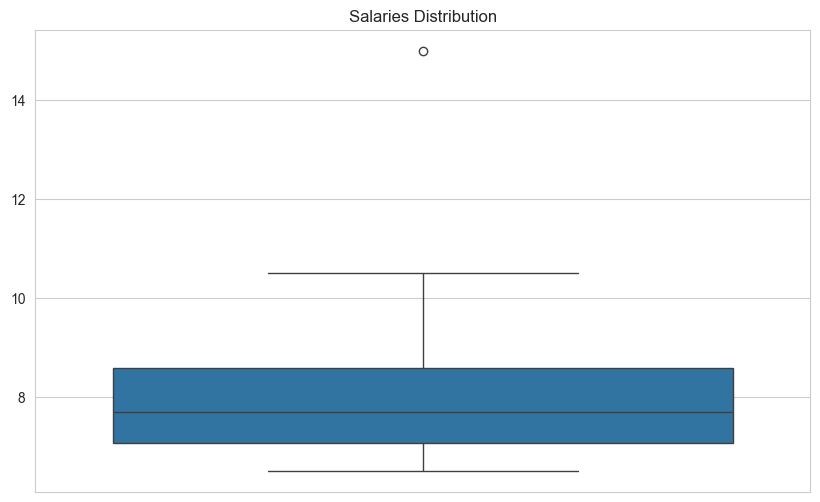

In [2]:
from statistics import variance


salaries = [6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]

mean = np.mean(salaries)
median = np.median(salaries)
mode = stats.mode(salaries)

print(f"Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode:.2f}")

range = np.max(salaries) - np.min(salaries)
variance = np.var(salaries, ddof=1)         # calculating sample variance with Bessel's correction (ddof=1)
std_dev = np.std(salaries, ddof=1)          # calculating sample standard deviation with Bessel's correction (ddof=1)
print(f"Range: {range:.2f}, Variance: {variance:.2f}, Standard Deviation: {std_dev:.2f}")


q1 = np.percentile(salaries, 25)
q3 = np.percentile(salaries, 75)
iqr = q3 - q1
print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(salaries)
plt.title("Salaries Distribution")
plt.show()

The IQR and box-plot tells that there is a potential outlier in the annual salaries which is 15 lakhs INR.

### Problem-2

A tech company conducted a customer satisfaction survey, rating their latest product on a scale of 1 to 10 (10 being highly satisfied). The scores from 30 randomly selected customers are:
[7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

(a) Create a frequency distribution table for these scores.

(b) Plot a histogram of the customer satisfaction scores. Describe the shape of the distribution (e.g., symmetric, skewed).

(c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

(d) Calculate the excess kurtosis for this data using sample kurtosis formula. What does the kurtosis value suggest about the tails of the distribution?

### Solution:

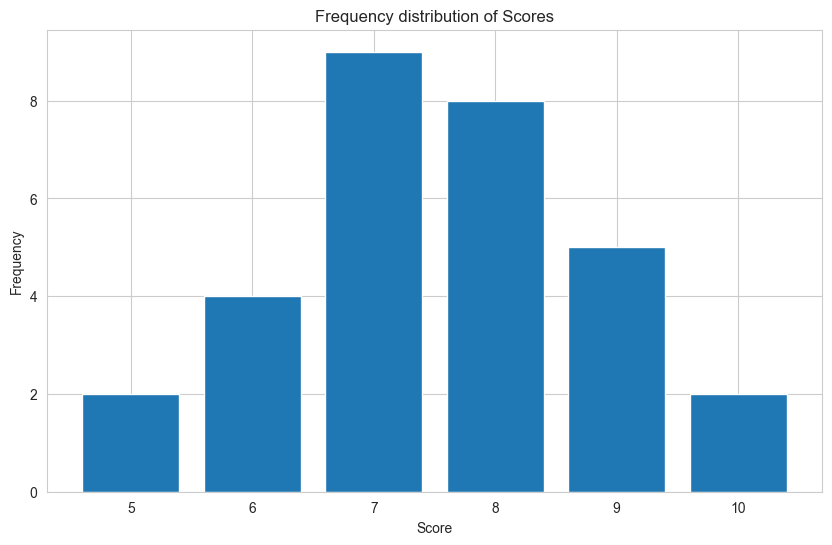

In [3]:
scores = [7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

scores_count = pd.Series(scores).value_counts()

plt.figure(figsize=(10, 6))
plt.bar(scores_count.index, scores_count.values)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Frequency distribution of Scores")
plt.show()

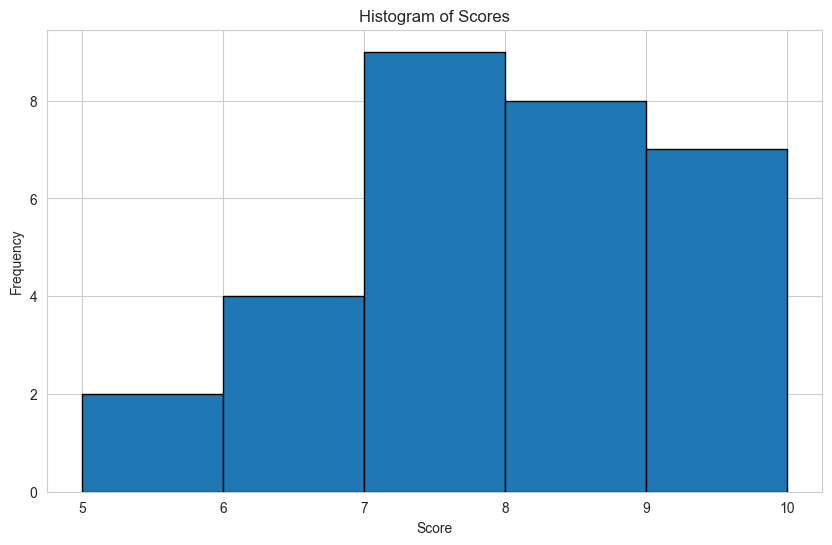

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=5, edgecolor="black")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")
plt.show()

In [5]:
def pearson_first_skewness(data):
    x = np.array(data.copy())
    mean = np.mean(x)
    std = np.std(x, ddof=1)
    mode = stats.mode(x)

    if std == 0:
        return "Error in computing Pearson's first skewness: Standard deviation is 0"
    sk1 = (mean - mode) / std
    return sk1

def pearson_second_skewness(data):
    x = np.array(data.copy())
    mean = np.mean(x)
    median = np.median(x)
    std = np.std(x, ddof=1)

    if std == 0:
        return "Error in computing Pearson's second skewness: Standard deviation is 0"
    sk2 = (3 * (mean - median)) / std
    return sk2



sk1 = pearson_first_skewness(scores)
sk2 = pearson_second_skewness(scores)

print(f"Pearson's first skewness: {sk1:.2f}, Pearson's second skewness: {sk2:.2f}")

Pearson's first skewness: 0.41, Pearson's second skewness: 0.08


As the skewness is positive and the value is < 0.5 so the data is approximately symmetric.

In [6]:
def kurtosis(data):
    x = np.array(data.copy())
    mean = np.mean(x)
    std = np.std(x, ddof=1)
    n = len(x)
    if n < 4:
        return "Error in computing kurtosis: Sample size is less than 4"
    if std == 0:
        return "Error in computing kurtosis: Standard deviation is 0"
    
    alpha = (n * (n + 1)) / ((n - 1) * (n - 2) * (n - 3))
    beta = (3 * (n - 1) ** 2) / ((n - 2) * (n - 3))
    kurtosis = alpha * np.sum((x - mean) ** 4) / (std ** 4) - beta
    return kurtosis


kurtosis = kurtosis(scores)
print(f"Kurtosis: {kurtosis:.2f}")

Kurtosis: -0.38


As the excess kurtosis is negative, the distribution has light tails, `Platykurtic distribution` 

### Problem-3

A marketing team wants to understand the relationship between their monthly advertising expenditure (in INR Lakhs) and corresponding sales revenue (in INR Lakhs) over the last 10 months.

| Month | Advertising Spend (X) | Sales Revenue (Y) |
|-------|-----------------------|-------------------|
|     1 |                     5 |                52 |
|     2 |                     7 |                65 |
|     3 |                     6 |                60 |
|     4 |                     8 |                70 |
|     5 |                     5 |                55 |
|     6 |                     9 |                75 |
|     7 |                     7 |                68 |
|     8 |                    10 |                80 |
|     9 |                     6 |                58 |
|    10 |                     8 |                72 |


(a) Calculate the covariance between advertising spend and sales revenue.

(b) Plot Sales Revenue vs Advertising spent.

(c) Calculate the Pearson correlation coefficient between advertising spend and sales revenue.

(d) Interpret the meaning of both the covariance and the correlation coefficient in the context of this data.

### Solution:

Covariance: 14.94


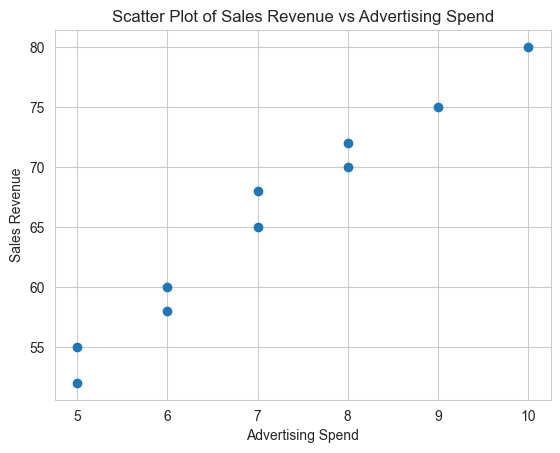

Correlation: 0.99


In [7]:
advertising_data = np.array([5, 7, 6, 8, 5, 9, 7, 10, 6, 8])
sales_data = np.array([52, 65, 60, 70, 55, 75, 68, 80, 58, 72])

covariance = np.cov(advertising_data, sales_data)[0,1]
print(f"Covariance: {covariance:.2f}")

plt.scatter(advertising_data, sales_data)
plt.xlabel("Advertising Spend")
plt.ylabel("Sales Revenue")
plt.title("Scatter Plot of Sales Revenue vs Advertising Spend")
plt.show()

correlation = np.corrcoef(advertising_data, sales_data)[0,1]
print(f"Correlation: {correlation:.2f}")



The advertising spend and the sales revenue are highly correlated.

### Problem-4

A traffic department claims that the average daily commute time for residents in a certain city is 45 minutes. A researcher believes this claim is too low and collects data from a random sample of 100 residents. The sample mean commute time is 48 minutes with a standard deviation of 12 minutes.

(a) Formulate the null and alternative hypotheses for this scenario.

(b) Construct a 95% confidence interval for the true average daily commute time.

(c) Based on the confidence interval, what can you conclude about the traffic department's claim?

### Solution:

(a) Formulate the null and alternative hypotheses for this scenario.

Null Hypothesis (H0): The true average daily commute time for residents in the city is 45 minutes. (μ=45)

Alternative Hypothesis (H1): The true average daily commute time for residents in the city is greater than 45 minutes. (μ>45)

-------------------------------------------------------------------------------

(b) Construct a 95% confidence interval for the true average daily commute time.

We have the following information:

- Sample size (n) = 100

- Sample mean ($\bar{x}$) = 48 minutes

- Sample standard deviation (s) = 12 minutes

- Confidence level = 95%

Since the sample size is large (n≥30), we can use the z-distribution. For a 95% confidence interval, the critical z-value is 1.96.

The formula for the confidence interval is: $\bar{x} \pm z \cdot \frac{s}{\sqrt{n}}$

The standarde error (SE): $\frac{s}{\sqrt{n}} = \frac{12}{sqrt{100}} = \frac{12}{10} = 1.2$ 

Now, the margin of error: $z \cdot SE = 1.96 \cdot 1.2 = 2.352$

Finally the confidence interval = $48 \pm 2.352$ 

Hence, lower bound = $48 - 2.352 = 45.648$ and upper bound = $48 + 2.352 = 50.352$

Therefore, the 95% confidence interval for the true average daily commute time is (45.648 minutes, 50.352 minutes)

-------------------------------------------------------------------------------

(c) Based on the confidence interval, what can you conclude about the traffic department's claim?

The traffic department claims the average daily commute time is 45 minutes. Our 95% confidence interval for the true average daily commute time is (45.648 minutes, 50.352 minutes).

Since the claimed average of 45 minutes falls outside (below) the 95% confidence interval, we can conclude that there is sufficient evidence to reject the traffic department's claim. The confidence interval suggests that the true average daily commute time is likely higher than 45 minutes.

### Problem-5

A manufacturing company wants to estimate the average number of units produced per hour by a new machine. They take 36 random observations and find the sample mean to be 150 units with a sample standard deviation of 15 units.

(a) What is the point estimate for the true average number of units produced per hour?

(b) Construct a 99% confidence interval for the true average number of units produced per hour.

(c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

### Solution:

(a) What is the point estimate for the true average number of units produced per hour?

The point estimate for the true average is the sample mean.
Given: Sample mean = 150 units.
So, the point estimate for the true average number of units produced per hour is 150 units.

--------------------------------------

(b) Construct a 99% confidence interval for the true average number of units produced per hour.

We have the following information:

- Sample size (n) = 36

- Sample mean ($\bar{x}$) = 150 units

- Sample standard deviation ($s$) = 15 units

- Confidence level = 99%

Since the sample size is large (n≥30), we use the z-distribution. For a 99% confidence interval, the critical z-value is 2.576 (or commonly approximated as 2.58).

The formula for the confidence interval is:

Confidence Interval= $\bar{x} \pm z \cdot \frac{s}{\sqrt{n}}$

First, calculate the standard error (SE):

SE= $\frac{s}{\sqrt{n}} = \frac{15}{sqrt{36}} = \frac{15}{6} = 2.5$ 

Next, calculate the margin of error (ME):

$ME=z \cdot SE=2.576⋅2.5=6.44$

Now, construct the confidence interval:

Confidence Interval=150±6.44

Lower Bound=150−6.44=143.56

Upper Bound=150+6.44=156.44

Therefore, the 99% confidence interval for the true average number of units produced per hour is (143.56 units, 156.44 units).

-----------------------------------

(c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

We want the margin of error (ME) to be 3 units.

We know the formula for the margin of error is:

$ME=z \cdot SE$

We are given:

Desired Margin of Error (ME) = 3

Confidence level = 99%, so z=2.576

Standard deviation (s) = 15

We need to solve for n:

$3=2.576 \cdot \frac{15}{\sqrt{n}}$

$ \sqrt{n} = \frac{2.576 \cdot 15}{3} = 12.88$

$n = 12.88^2 = 165.89 \approx 166$

Since the sample size must be a whole number, we always round up to ensure the desired margin of error and confidence level are met.

Therefore, the company would need a sample size of 166 observations.

### Problem-6

A website designer believes that a new website redesign will increase the average time users spend on the site. Before the redesign, the average time spent was 3.5 minutes. After the redesign, a random sample of 50 users showed an average time of 3.8 minutes with a standard deviation of 1.0 minute.

(a) Perform a one-sided hypothesis test at a 0.05 significance level to determine if the redesign significantly increased the average time spent.

(b) State your null and alternative hypotheses, calculate the test statistic, and determine the p-value.

(c) What is your conclusion regarding the website redesign's impact?

### Solution:

Here's the information given:

- Population mean before redesign ($\mu_0$) = 3.5 minutes

- Sample size ($n$) = 50 users

- Sample mean after redesign ($\bar{x}$) = 3.8 minutes

- Sample standard deviation ($s$) = 1.0 minute

- Significance level ($\alpha$) = 0.05

**1. Formulate the null and alternate hypothesis**

The website designer believes the redesign will increase the average time. This indicates a one-sided (right-tailed) test.

- Null Hypothesis ($H_0$): The redisgn didn't increase the average time spent on the site. ($\mu \leq 3.5$)

- Alternate Hypothesis ($H_1$): The redesign increased the average time spent on the site. ($\mu \gt 3.5$)

**2. Calculate the test statistics**

For one-sample t-test, the formula for the test statistic is:

$t = \frac{\bar{x}-\mu_0}{s/\sqrt{n}} = \frac{3.8 - 3.5}{1/\sqrt{50}} = \frac{0.3}{1/7.071} = \frac{0.3}{0.1414} \approx 2.12$

**3. Determine the degrees of freedom**

df = 50 - 1 = 49

**4. Calculate the p-value**

The p-value = 0.019547

Since the p-value (which is less than 0.025) is still less than the significance level (0.05), we reject the null hypothesis.

**5. Final conclusion**

There is sufficient statistical evidence at the 0.05 significance level to conclude that the website redesign significantly increased the average time users spend on the site.

In [8]:
import scipy.stats as stats

def one_sample_t_test(sample_mean, population_mean, sample_std, sample_size, significance_level, method="two-tailed"):
    """
    Perform a one-sample t-test to determine if the sample mean is significantly different from the population mean.

    Parameters:
    sample_mean: float
    population_mean: float
    sample_std: float
    sample_size: int
    significance_level: float
    method: str, optional (default="two-tailed")

    Returns:
    t_stat: float
    p_value: float

    Example:
    t_stat, p_value = one_sample_t_test(sample_mean=3.8, population_mean=3.5, sample_std=1.0, sample_size=50, significance_level=0.05, method="right-tailed")
    """
    t_stat = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    df = sample_size - 1
    if method == "two-tailed":
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    elif method == "right-tailed":
        p_value = 1 - stats.t.cdf(t_stat, df)
    elif method == "left-tailed":
        p_value = stats.t.cdf(t_stat, df)
    else:
        raise ValueError("Invalid method. Please choose from 'two-tailed', 'right-tailed', or 'left-tailed'.")

    # Check if the p-value is less than the significance level
    if p_value < significance_level:
        print(f"Reject the null hypothesis.")
    else:
        print(f"Fail to reject the null hypothesis.")
    return t_stat, p_value


# In our example case we will use the following values:
# sample_mean = 3.8
# population_mean = 3.5
# sample_std = 1.0
# sample_size = 50
# significance_level = 0.05
# method = "right-tailed"

t_stat, p_value = one_sample_t_test(sample_mean=3.8, population_mean=3.5, sample_std=1.0, sample_size=50, significance_level=0.05, method="right-tailed")

print(f"Test statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

Reject the null hypothesis.
Test statistic: 2.12
P-value: 0.0195


### Problem-7

A company implemented a new training program to improve employee productivity. To assess its effectiveness, 15 employees' productivity scores were recorded before and after the training program. The scores are as follows:

| Employee | Before Training | After Training |
|----------|-----------------|----------------|
|        1 |              65 |             70 |
|        2 |              70 |             72 |
|        3 |              60 |             68 |
|        4 |              75 |             73 |
|        5 |              80 |             85 |
|        6 |              68 |             70 |
|        7 |              72 |             75 |
|        8 |              62 |             65 |
|        9 |              78 |             80 |
|       10 |              70 |             72 |
|       11 |              66 |             69 |
|       12 |              73 |             76 |
|       13 |              64 |             67 |
|       14 |              71 |             74 |
|       15 |              69 |             71 |

(a) State the null and alternative hypotheses to test if the training program significantly improved productivity.

(b) Conduct a paired samples t-test at a 0.05 significance level. Calculate the test statistic and the p-value.

(c) Based on your analysis, did the training program effectively improve employee productivity?

### Solution:

We can calculate the difference (after - before) in productivity score as following:

| Employee | Before Training | After Training | Difference (after - before) |
|----------|-----------------|----------------|-----------------------------|
|        1 |              65 |             70 |                            5|
|        2 |              70 |             72 |                            2|
|        3 |              60 |             68 |                            8|
|        4 |              75 |             73 |                           -2|
|        5 |              80 |             85 |                            5|
|        6 |              68 |             70 |                            2|
|        7 |              72 |             75 |                            3|
|        8 |              62 |             65 |                            3|
|        9 |              78 |             80 |                            2|
|       10 |              70 |             72 |                            2|
|       11 |              66 |             69 |                            3|
|       12 |              73 |             76 |                            3|
|       13 |              64 |             67 |                            3|
|       14 |              71 |             74 |                            3|
|       15 |              69 |             71 |                            2|

(a) Null and Alternate Hypothesis:

- Null Hypothesis ($H_0$): There is no significant improvement in productivity before and after training program. i.e. the mean difference ($\mu_D$) = 0.
- Alternate Hypothesis ($H_1$): There is a significant improvement in productivity before and after training program. i.e. $\mu_D > 0$

This is a one-sided (right-tailed) t-test.

(b) Conduct a paired sample t-test at 0.05 significance level.

In [9]:
difference = [5, 2, 8, -2, 5, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2]

sample_mean = np.mean(difference)
sample_std = np.std(difference, ddof=1)
sample_size = len(difference)

print(f"sample_mean: {sample_mean:.2f}, sample_std: {sample_std:.2f}, sample_size: {sample_size}")

t_stat, p_value = one_sample_t_test(sample_mean=sample_mean, population_mean=0, sample_std=sample_std, sample_size=sample_size, significance_level=0.05, method="right-tailed")

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

sample_mean: 2.93, sample_std: 2.12, sample_size: 15
Reject the null hypothesis.
t-statistic: 5.36, p-value: 0.0001


(c) Conclusion: There is sufficient statistical evidence at the 0.05 significance level to conclude that the training program significantly improves the productivity of the employees.

### Problem-8

A battery manufacturer claims that their new 'ProLife' battery lasts longer than their existing 'Standard' battery. A consumer watchdog organization tests 40 'ProLife' batteries and 50 'Standard' batteries. The results are:

ProLife: Sample mean life = 120 hours, Sample standard deviation = 10 hours

Standard: Sample mean life = 115 hours, Sample standard deviation = 12 hours

(a) State the null and alternative hypotheses for testing the manufacturer's claim.

(b) Perform a t-test for two independent means at a 0.02 significance level.

(c) What is your conclusion regarding the manufacturer's claim about the 'ProLife' battery?

### Solution:

In [10]:
def two_sample_t_test(sample_mean_1, sample_std_1, sample_size_1, sample_mean_2, sample_std_2, sample_size_2, significance_level, method="two-tailed"):
    """
    Perform a two-sample t-test to compare the means of two independent samples.

    Parameters:
    sample_mean_1: float, mean of the first sample
    sample_std_1: float, standard deviation of the first sample
    sample_size_1: int, size of the first sample
    sample_mean_2: float, mean of the second sample
    sample_std_2: float, standard deviation of the second sample
    sample_size_2: int, size of the second sample
    significance_level: float, significance level
    method: str, method to calculate the p-value. Default is "two-tailed".

    Returns:
    t_stat: float, t-statistic
    p_value: float, p-value
    df: int, degrees of freedom
    pooled_std: float, pooled standard deviation

    Example:
    t_stat, p_value, df, pooled_std = two_sample_t_test(sample_mean_1=120, sample_std_1=10, sample_size_1=40, sample_mean_2=115, sample_std_2=12, sample_size_2=50, significance_level=0.05, method="right-tailed")
    print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}, degrees of freedom: {df}, pooled_std: {pooled_std:.2f}")
    """

    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((sample_size_1 - 1) * sample_std_1**2 + (sample_size_2 - 1) * sample_std_2**2) / (sample_size_1 + sample_size_2 - 2))
    
    # Calculate the t-statistic
    t_stat = (sample_mean_1 - sample_mean_2) / (pooled_std * np.sqrt(1/sample_size_1 + 1/sample_size_2))
    
    # Calculate the degrees of freedom
    df = sample_size_1 + sample_size_2 - 2
    
    # Calculate the p-value
    if method == "two-tailed":
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
    elif method == "right-tailed":
        p_value = 1 - stats.t.cdf(t_stat, df)
    elif method == "left-tailed":
        p_value = stats.t.cdf(t_stat, df)
    else:
        raise ValueError("Invalid method. Please choose from 'two-tailed', 'right-tailed', or 'left-tailed'.")

    # Check if the p-value is less than the significance level
    if p_value < significance_level:
        print("Reject the null hypothesis")
    else:
        print("Fail to reject the null hypothesis")
    
    return t_stat, p_value, df, pooled_std


# In our example, we have the following data:
# sample_mean_1 = 120
# sample_std_1 = 10
# sample_size_1 = 40
# sample_mean_2 = 115
# sample_std_2 = 12
# sample_size_2 = 50
# significance_level = 0.02
# method = "right-tailed"

t_stat, p_value, df, pooled_std = two_sample_t_test(sample_mean_1=120, 
                                                    sample_std_1=10, 
                                                    sample_size_1=40, 
                                                    sample_mean_2=115, 
                                                    sample_std_2=12, 
                                                    sample_size_2=50, 
                                                    significance_level=0.02, 
                                                    method="right-tailed")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}, degrees of freedom: {df}, pooled_std: {pooled_std:.2f}")


Reject the null hypothesis
t-statistic: 2.11, p-value: 0.0187, degrees of freedom: 88, pooled_std: 11.16


There is sufficient statistical evidence at the 0.02 significance level to conclude that the 'ProLife' batteries lasts significantly longer than 'Standard' batteris.

### Problem-9

A popular restaurant chain claims that the average waiting time for a table on weekends is no more than 20 minutes. A local food critic believes it's longer. They record the waiting times (in minutes) for 30 randomly selected tables on various weekends:

`[22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]`

(a) Calculate the sample mean and sample standard deviation of the waiting times.

(b) Conduct a one-sided t-test at a 0.01 significance level to assess the food critic's belief.

(c) State your null and alternative hypotheses, calculate the test statistic, and determine the critical value.

(d) Based on your findings, what can you tell the food critic?

### Solution:

In [11]:
waiting_times = [22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]

sample_size = len(waiting_times)

sample_mean = np.mean(waiting_times)

sample_std = np.std(waiting_times, ddof=1)

print(f"sample_mean: {sample_mean:.2f}, sample_std: {sample_std:.2f}, sample_size: {sample_size}")

# Null hypothesis: The mean waiting time is no more than 20 minutes.
# alternate hypothesis: The mean waiting time is longer than 20 minutes. (This is a right-tailed test)

t_stat, p_value = one_sample_t_test(sample_mean=sample_mean, population_mean=20, sample_std=sample_std, sample_size=sample_size, significance_level=0.01, method="right-tailed")

print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

sample_mean: 24.37, sample_std: 3.93, sample_size: 30
Reject the null hypothesis.
t-statistic: 6.09, p-value: 0.0000


Conclusion: Based on these findings, we can tell the food critic that there is sufficient evidence at the 0.01 significance level to support their belief that the average waiting time for a table on weekends at this restaurant chain is longer than 20 minutes.

### Problem-10

A software company is launching a new application and offers three different subscription tiers (Basic, Premium, Elite), each with varying features. Before the full launch, they conduct a pilot study to see if there's an association between a customer's age group and their preferred subscription tier. They surveyed 300 randomly selected potential customers and recorded their age group and preferred tier:

| Age Group   | Basic | Premium | Elite | Total |
|-------------|-------|---------|-------|-------|
| 18-29 years |    45 |      60 | 15    | 120   |
| 30-49 years |    30 |      50 | 20    | 100   |
|   50+ years |    25 |      40 | 15    | 80    |
|       Total |   100 |     150 | 50    | 300   |


(a) State the null and alternative hypotheses for the test of independence in this context.

(b) Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.

(c) Calculate the chi-square test statistic.

(d) Using a significance level of α=0.05, determine the critical value for this test.

(e) What is your conclusion? Is there a significant association between a customer's age group and their preferred subscription tier? Justify your answer based on your calculated chi-square statistic and the critical value.

### Solution:

(a) State the null and alternate hypothesis for the test of independence in this context

Null Hypothesis ($H_0$): There is no association between a customer's age group and their preferred subscription tier. In other words, the two variables are independent.

Alternative Hypothesis ($H_1$): There is a significant association between a customer's age group and their preferred subscription tier. In other words, the two variables are dependent.

---------------------------

(b) Calculate the expected frequencies for each cell in the table, assuming null hypothesis is true

The formula for calculating expected frequencies. 

$$ E_{ij} = \frac{(row\ total_i) \times (column\ total_j)}{Grand\ Total} $$

By this formula the expected frequencies for each cell are as following:

| Age Group   | Basic | Premium | Elite | Total |
|-------------|-------|---------|-------|-------|
| 18-29 years |    40 |      60 | 20    | 120   |
| 30-49 years |    33.33 |      50 | 16.67    | 100   |
|   50+ years |    26.67 |      40 | 13.33    | 80    |
|       Total |   100 |     150 | 50    | 300   |

---------------------------

(c) Calculate the $\chi^2$ test statistic

$$ \chi^2 = \sum_{ij} \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \approx 3.187 $$

--------------------------

(d) Using a significance level of α=0.05, determine the critical value for this test.

degrees of freedom : $df = (Number\ of\ rows - 1) \times (Number\ of\ columns - 1) = (3-1) \times (3-1) = 2 \times 2 = 4$

Using the $\chi^2$ distribution table with df=4 and α=0.05, the critical value is approximately 9.488.

--------------------------

(e) Conclusion

Since the calculated chi-square statistic (3.187) is less than the critical value (9.488), we fail to reject the null hypothesis.

Therefore, at a 0.05 significance level, there is no significant association between a customer's age group and their preferred subscription tier based on this pilot study. The observed differences in subscription preferences across age groups are likely due to random sampling variation rather than a true underlying relationship.

In [12]:
import numpy as np
from scipy.stats import chi2_contingency, chi2

def chi_square_test_of_independence(observed_data, alpha=0.05):
    """
    Performs a chi-square test of independence on a contingency table.

    Args:
        observed_data (list of lists or numpy array): The observed frequencies
                                                    in a contingency table.
        alpha (float): The significance level (default is 0.05).

    Returns:
        dict: A dictionary containing the test results, including:
              - 'null_hypothesis': The stated null hypothesis.
              - 'alternative_hypothesis': The stated alternative hypothesis.
              - 'observed_frequencies': The input observed frequencies.
              - 'expected_frequencies': The calculated expected frequencies.
              - 'chi2_statistic': The calculated chi-square test statistic.
              - 'degrees_of_freedom': The degrees of freedom.
              - 'p_value': The p-value of the test.
              - 'critical_value': The critical value for the given alpha.
              - 'conclusion': The conclusion of the test (reject/fail to reject H0).
              - 'association': Whether there is a significant association.
    """

    observed_data = np.array(observed_data)

    # Calculate the expected frequencies for each cell
    # chi2_contingency returns: chi2, p, dof, expected
    chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(observed_data)

    # Determine the critical value for this test
    critical_value = chi2.ppf(1 - alpha, dof)

    # Conclusion
    if chi2_stat > critical_value:
        conclusion = f"Since the calculated chi-square statistic ({chi2_stat:.4f}) > critical value ({critical_value:.4f}), we reject the null hypothesis."
        association = "There is a significant association between a customer's age group and their preferred subscription tier."
    else:
        conclusion = f"Since the calculated chi-square statistic ({chi2_stat:.4f}) <= critical value ({critical_value:.4f}), we fail to reject the null hypothesis."
        association = "There is no significant association between a customer's age group and their preferred subscription tier."

    results = {
        'observed_frequencies': observed_data.tolist(),
        'expected_frequencies': expected_frequencies.tolist(),
        'chi2_statistic': chi2_stat,
        'degrees_of_freedom': dof,
        'p_value': p_value,
        'critical_value': critical_value,
        'conclusion': conclusion,
        'association': association
    }
    return results

# The observed data from the problem
observed_data = [
    [45, 60, 15],
    [30, 50, 20],
    [25, 40, 15]
]

# Run the chi-square test
results = chi_square_test_of_independence(observed_data, alpha=0.05)

# Print the results

print("Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.")
print("Observed Frequencies:")
print(np.array(results['observed_frequencies']))
print("\nExpected Frequencies (calculated by scipy.stats.chi2_contingency):")
print(np.array(results['expected_frequencies']).round(2))
print("\n")

print("Calculate the chi-square test statistic.")
print(f"Chi-square Test Statistic: {results['chi2_statistic']:.4f}\n")

print("Using a significance level of alpha=0.05, determine the critical value for this test.")
print(f"Degrees of Freedom: {results['degrees_of_freedom']}")
print(f"Critical Value (alpha=0.05): {results['critical_value']:.4f}\n")

print("Conclusion")
print(results['conclusion'])
print(results['association'])
print(f"P-value: {results['p_value']:.4f}")

Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.
Observed Frequencies:
[[45 60 15]
 [30 50 20]
 [25 40 15]]

Expected Frequencies (calculated by scipy.stats.chi2_contingency):
[[40.   60.   20.  ]
 [33.33 50.   16.67]
 [26.67 40.   13.33]]


Calculate the chi-square test statistic.
Chi-square Test Statistic: 3.1875

Using a significance level of alpha=0.05, determine the critical value for this test.
Degrees of Freedom: 4
Critical Value (alpha=0.05): 9.4877

Conclusion
Since the calculated chi-square statistic (3.1875) <= critical value (9.4877), we fail to reject the null hypothesis.
There is no significant association between a customer's age group and their preferred subscription tier.
P-value: 0.5270


### Bonus Problem

An e-commerce company is testing two different designs for its product pages (Design A and Design B) to see if one leads to significantly higher conversion rates (percentage of visitors who make a purchase). They randomly assigned 50,000 website visitors to see Design A and another 50,000 visitors to see Design B over a two-week period. At the end of the period, they collected data on the conversion rates. Due to data collection specifics, they have daily average conversion rates for 30 randomly selected days for each design, rather than individual visitor data.

Here are the summary statistics for the daily average conversion rates (in percentage points):

* Design A (Sample 1):

    - Number of days ($n_A$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_A$) = 2.85%
    - Sample Standard Deviation ($s_A$) = 0.45%

* Design B (Sample 2):

    - Number of days ($n_B$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_B$) = 3.05%
    - Sample Standard Deviation ($s_B$) = 0.60%

The company is concerned that the variability in conversion rates might differ between the two designs due to different aesthetic elements or backend processes.

(a) State the null and alternative hypotheses to test if there is a significant difference in the average daily conversion rates between Design A and Design B. (Consider a two-tailed test, as they are looking for any significant difference).

(b) Before performing the t-test, you need to decide whether to assume equal or unequal population variances. For the purpose of this problem, assume that a prior test suggests equal population variances.

(c) Calculate the appropriate test statistic (t-value) for comparing the two independent means, assuming equal population variances. Show all steps of your calculation.

(d) Determine the degrees of freedom for this test. 

(e) Using a significance level of α=0.05, determine the critical value(s) for your test.

(f) Based on your calculated test statistic and the critical value(s), what is your conclusion? Is there a statistically significant difference in the average daily conversion rates between Design A and Design B?

(g) Construct a 95% confidence interval for the difference between the true mean daily conversion rates $(μ_B - μ_A)$. Interpret this interval in the context of the problem.

(h) Show all the steps when a prior test suggests unequal population variances.

### Solution:

(a) State the null and alternative hypotheses

Let $\mu_A$ = true mean daily conversion rate for Design A

Let $\mu_B$ = true mean daily conversion rate for Design B

Null Hypothesis ($H_0$): There is no difference in the average daily conversion rates between Design A and Design B.

$H_0: \mu_A = \mu_B$ or $\mu_B - \mu_A = 0$

Alternative Hypothesis ($H_1$): There is a significant difference in the average daily conversion rates between Design A and Design B.

$H_1: \mu_A \neq \mu_B$ or $\mu_B - \mu_A \neq 0$

This is a two-tailed test.

------------------------------

(b) Equal or unequal variances?

The problem states:
> "assume that a prior test suggests equal population variances."

So, we will use the pooled variance (equal variances) version of the two-sample t-test.

-------------------------------

(c) Calculate the test statistic (t-value)

Given:
$n_A = 30$, $\bar{x}A = 2.85\%$, $s_A = 0.45\%$
$n_B = 30$, $\bar{x}B = 3.05\%$, $s_B = 0.60\%$

Step 1: Calculate the pooled standard deviation ($s_p$)
$$s_p = \sqrt{ \frac{(n_A - 1)s_A^2 + (n_B - 1)s_B^2}{n_A + n_B - 2} }$$
$$s_p = \sqrt{ \frac{(30-1) \times 0.45^2 + (30-1) \times 0.60^2}{30 + 30 - 2} }$$
$$= \sqrt{ \frac{29 \times 0.2025 + 29 \times 0.36}{58} }$$
$$= \sqrt{ \frac{5.8725 + 10.44}{58} }$$
$$= \sqrt{ \frac{16.3125}{58} }$$
$$= \sqrt{0.28125} \approx 0.5303$$

Step 2: Calculate the standard error (SE) of the difference
$$SE = s_p \times \sqrt{ \frac{1}{n_A} + \frac{1}{n_B} }$$
$$= 0.5303 \times \sqrt{ \frac{1}{30} + \frac{1}{30} }$$
$$= 0.5303 \times \sqrt{ \frac{2}{30} }$$
$$= 0.5303 \times \sqrt{0.0667}$$
$$= 0.5303 \times 0.2582 \approx 0.1370$$

Step 3: Calculate the t-statistic
$$t = \frac{ \bar{x}B - \bar{x}_A }{SE}$$
$$= \frac{3.05 - 2.85}{0.1370}$$
$$= \frac{0.20}{0.1370} \approx 1.46$$
Test statistic: $t \approx 1.46$

-----------------------------

(d) Determine the degrees of freedom

For pooled variance t-test:

$$df = n_A + n_B - 2 = 30 + 30 - 2 = 58$$

Degrees of freedom: $df = 58$

-----------------------------

(e) Find the critical value(s) at $\alpha = 0.05$

For a two-tailed test at $\alpha = 0.05$ with $df = 58$:

Critical values: $t_{\alpha/2, df} = t_{0.025, 58} = \pm 2.002$

Critical values: $t_{critical} = \pm 2.002$

---------------------------

(f) Make the decision

Compare the test statistic with critical values:

- $|t_{calculated}| = |1.46| = 1.46$

- $|t_{critical}| = 2.002$

Since $1.46 < 2.002$, we fail to reject the null hypothesis.

Decision: Fail to reject $H_0$

**Conclusion**

At the 5% significance level, there is insufficient evidence to conclude that there is a significant difference in the average daily conversion rates between Design A and Design B.

Conclusion: The data does not provide sufficient evidence to suggest that the two designs have different conversion rates.

--------------------------

(g) Construct a 95% confidence interval

The formula for the confidence interval is:

$$(\bar{x}B - \bar{x}_A) \pm t{\alpha/2, df} \times SE$$

$$(3.05 - 2.85) \pm 2.002 \times 0.1370$$

$$0.20 \pm 0.274$$

$$(-0.074, 0.474)$$

95% Confidence Interval: $(-0.074\%, 0.474\%)$

Interpretation: We are 95% confident that the true difference in mean daily conversion rates between Design B and Design A lies between -0.074% and 0.474%. Since this interval contains zero, it supports our decision to fail to reject the null hypothesis.

---------------------------

(h) Show steps for unequal population variances

If we assume unequal variances, we would use [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test):

Step 1: Calculate the standard error for unequal variances

$$SE = \sqrt{ \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B} }$$
$$= \sqrt{ \frac{0.45^2}{30} + \frac{0.60^2}{30} }$$
$$= \sqrt{ \frac{0.2025}{30} + \frac{0.36}{30} }$$
$$= \sqrt{0.00675 + 0.012}$$
$$= \sqrt{0.01875} \approx 0.1369$$

Step 2: Calculate the t-statistic
$$t = \frac{ \bar{x}_B - \bar{x}_A }{SE}$$
$$= \frac{3.05 - 2.85}{0.1369}$$
$$= \frac{0.20}{0.1369} \approx 1.46$$

Step 3: Calculate degrees of freedom (Welch-Satterthwaite equation for degrees of freedom)
$$df = \frac{ \left( \frac{s_A^2}{n_A} + \frac{s_B^2}{n_B} \right)^2 }{ \frac{(s_A^2/n_A)^2}{n_A-1} + \frac{(s_B^2/n_B)^2}{n_B-1} }$$
$$df = \frac{ \left( \frac{0.2025}{30} + \frac{0.36}{30} \right)^2 }{ \frac{(0.2025/30)^2}{29} + \frac{(0.36/30)^2}{29} }$$
$$= \frac{0.01875^2}{ \frac{0.00000456}{29} + \frac{0.0000144}{29} }$$
$$= \frac{0.0003516}{0.000000157 + 0.000000497}$$
$$= \frac{0.0003516}{0.000000654} \approx 53.8$$

Degrees of freedom: $df \approx 54$

Step 4: Critical values and decision

For $df = 54$ and $\alpha = 0.05$:

Critical values: $t_{0.025, 54} = \pm 2.005$

Since $|1.46| < 2.005$, we still fail to reject the null hypothesis.

Conclusion: Whether we assume equal or unequal variances, the result is the same - there is insufficient evidence to conclude that there is a significant difference in conversion rates between the two designs.

In [13]:
import numpy as np
from scipy import stats

def compare_means(
    mean1, std1, n1,
    mean2, std2, n2,
    alpha=0.05,
    equal_var=True,
    tail='two-sided'  # options: 'two-sided', 'left', 'right'
):
    """
    Performs a two-sample t-test (equal or unequal variances) and computes the 95% confidence interval.

    Parameters:
        mean1, std1, n1: Mean, std, and sample size for group 1
        mean2, std2, n2: Mean, std, and sample size for group 2
        alpha: Significance level (default 0.05)
        equal_var: If True, assumes equal variances (pooled); if False, uses Welch's t-test
        tail: 'two-sided', 'left', or 'right' for test type

    Returns:
        dict with t_stat, df, p_value, conf_int (tuple), test_type, tail, t_crit, and conclusion
    """
    # Calculate standard error
    if equal_var:
        # Pooled standard deviation
        sp = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
        se = sp * np.sqrt(1/n1 + 1/n2)
        df = n1 + n2 - 2
        test_type = "Pooled (equal variances)"
    else:
        se = np.sqrt(std1**2/n1 + std2**2/n2)
        # Welch-Satterthwaite equation for degrees of freedom
        df = (std1**2/n1 + std2**2/n2)**2 / (
            ((std1**2/n1)**2)/(n1-1) + ((std2**2/n2)**2)/(n2-1)
        )
        test_type = "Welch (unequal variances)"

    # t-statistic
    t_stat = (mean2 - mean1) / se

    # p-value calculation and critical value
    if tail == 'two-sided':
        p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
        t_crit = stats.t.ppf(1 - alpha/2, df)
        reject = abs(t_stat) > t_crit
    elif tail == 'right':
        p_value = 1 - stats.t.cdf(t_stat, df)
        t_crit = stats.t.ppf(1 - alpha, df)
        reject = t_stat > t_crit
    elif tail == 'left':
        p_value = stats.t.cdf(t_stat, df)
        t_crit = stats.t.ppf(alpha, df)
        reject = t_stat < t_crit
    else:
        raise ValueError("tail must be 'two-sided', 'left', or 'right'")

    # Confidence interval (always two-sided)
    diff = mean2 - mean1
    conf_int = (diff - stats.t.ppf(1 - alpha/2, df)*se, diff + stats.t.ppf(1 - alpha/2, df)*se)

    # Conclusion
    if reject:
        conclusion = f"Reject the null hypothesis at alpha={alpha}. There is a statistically significant difference."
    else:
        conclusion = f"Fail to reject the null hypothesis at alpha={alpha}. There is no statistically significant difference."

    return {
        "t_stat": t_stat,
        "df": df,
        "p_value": p_value,
        "conf_int": conf_int,
        "test_type": test_type,
        "tail": tail,
        "t_crit": t_crit,
        "conclusion": conclusion
    }

# Example usage for the bonus problem:
result_equal = compare_means(
    mean1=2.85, std1=0.45, n1=30,
    mean2=3.05, std2=0.60, n2=30,
    alpha=0.05, equal_var=True, tail='two-sided'
)

result_unequal = compare_means(
    mean1=2.85, std1=0.45, n1=30,
    mean2=3.05, std2=0.60, n2=30,
    alpha=0.05, equal_var=False, tail='two-sided'
)

print("Equal variances, two-sided test:")
print(f"t-statistic: {result_equal['t_stat']:.2f}")
print(f"Degrees of freedom: {result_equal['df']:.2f}")
print(f"Critical value: {result_equal['t_crit']:.3f}")
print(f"p-value: {result_equal['p_value']:.4f}")
print(f"95% confidence interval: ({result_equal['conf_int'][0]:.3f}, {result_equal['conf_int'][1]:.3f})")
print(f"Test type: {result_equal['test_type']}, Tail: {result_equal['tail']}")
print(f"Conclusion: {result_equal['conclusion']}\n")

print("Unequal variances, two-sided test:")
print(f"t-statistic: {result_unequal['t_stat']:.2f}")
print(f"Degrees of freedom: {result_unequal['df']:.2f}")
print(f"Critical value: {result_unequal['t_crit']:.3f}")
print(f"p-value: {result_unequal['p_value']:.4f}")
print(f"95% confidence interval: ({result_unequal['conf_int'][0]:.3f}, {result_unequal['conf_int'][1]:.3f})")
print(f"Test type: {result_unequal['test_type']}, Tail: {result_unequal['tail']}")
print(f"Conclusion: {result_unequal['conclusion']}")

Equal variances, two-sided test:
t-statistic: 1.46
Degrees of freedom: 58.00
Critical value: 2.002
p-value: 0.1495
95% confidence interval: (-0.074, 0.474)
Test type: Pooled (equal variances), Tail: two-sided
Conclusion: Fail to reject the null hypothesis at alpha=0.05. There is no statistically significant difference.

Unequal variances, two-sided test:
t-statistic: 1.46
Degrees of freedom: 53.78
Critical value: 2.005
p-value: 0.1499
95% confidence interval: (-0.075, 0.475)
Test type: Welch (unequal variances), Tail: two-sided
Conclusion: Fail to reject the null hypothesis at alpha=0.05. There is no statistically significant difference.
